In [2]:
%matplotlib inline
import cv2 # tested with 3.1.0 version
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib

In [3]:
def my_imread(imagepath):    
    image = cv2.imread(imagepath) # Read the image from imagepath.
    return image

In [4]:
# 2. Image Enhancement
## 2.1 Histogram

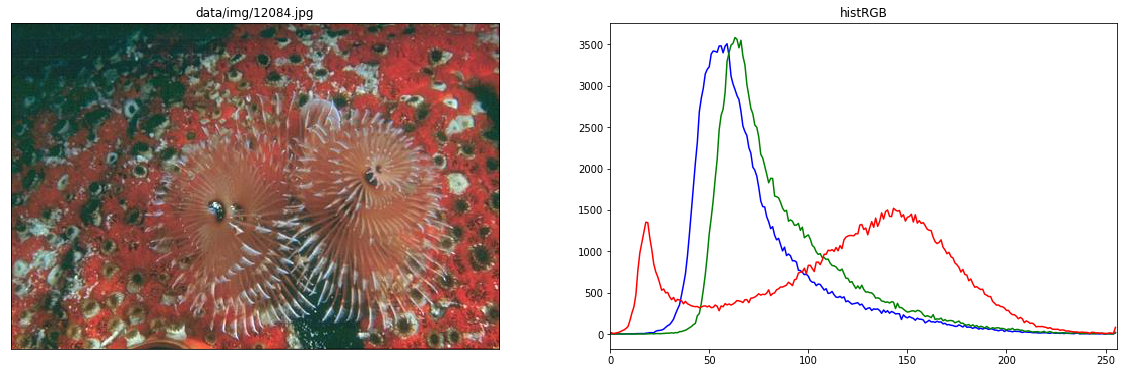

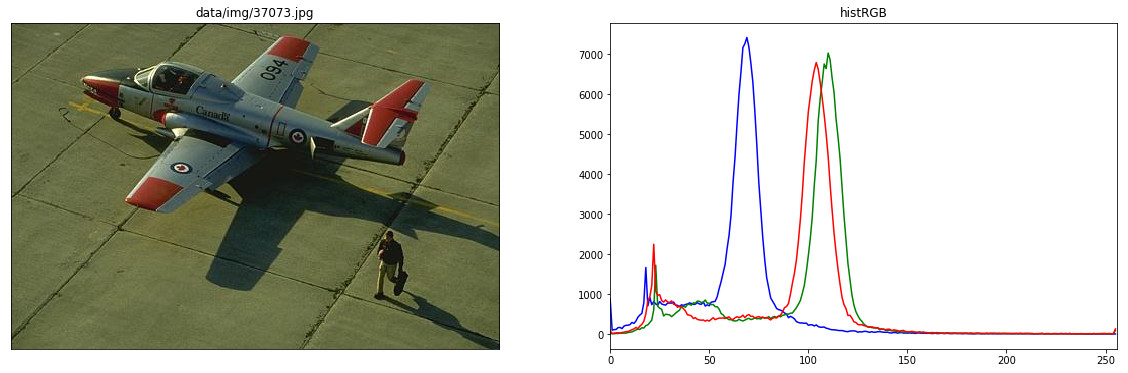

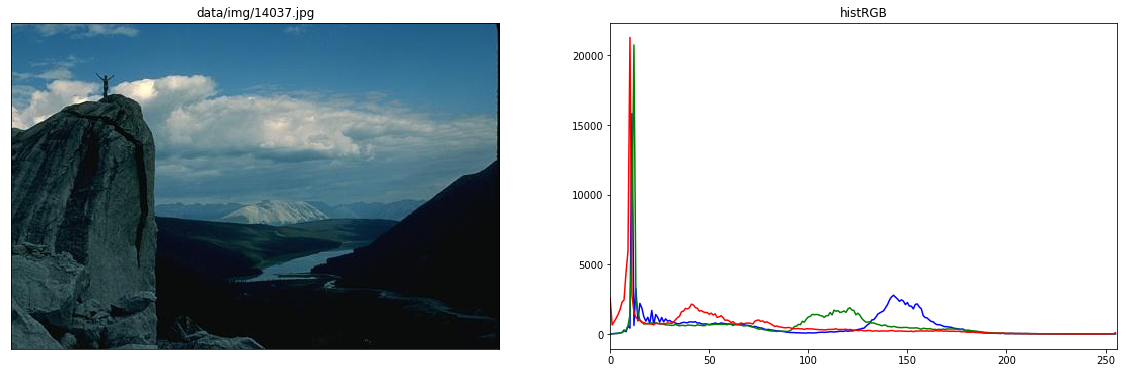

In [8]:
IMG_NAMES = ['12084.jpg', '37073.jpg', '14037.jpg'] # Take any 3 images from the dataset in "data/img"

def show_histRGB(img, imagepath):
    color = ('b', 'g', 'r')
    plt.figure(figsize=(20, 6)) # Figure size can be adjusted.
    plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # show the corresponding rgb image using pyplot.
    plt.xticks([]), 
    plt.yticks([])
    plt.title(imagepath)
    for i, col in enumerate(color):
        # a) Calculate the histograms for this image.
        histr = cv2.calcHist([img],[i],None,[256],[0, 256])
        plt.subplot(122), plt.plot(histr, color = col) # plot histogram with the b g r channels.
        plt.xlim([0, 256])
        plt.title("histRGB")
    plt.show()
    
for imagename in IMG_NAMES:
    imagepath = os.path.join('data/img/', imagename)
    img = my_imread(imagepath) # read the image from image path using opencv.
    show_histRGB(img, imagepath)

### b) What can you say about the spread of the color intensities for these images? (Please briefly answer this question in this block)
Looking at the images, it seems as though the colors distributions are pretty similar. In the first pic there is a lot of red, which is reflected in the histogram with red distribution having a higher mean. Similarly in the second picture, we can see a good amount of green and red in the image itself which is reflected in the histogram. In the third image, there is a whole lot of white and then some blue which is visible by looking at relatively similar distributions of R,G,B with b having a bit more component towards the higher side.

## 2.2 Global Histogram Equalization

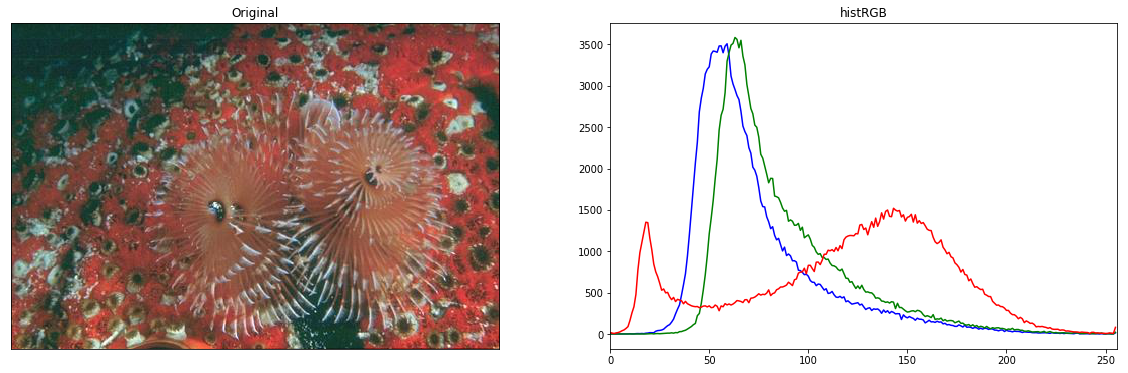

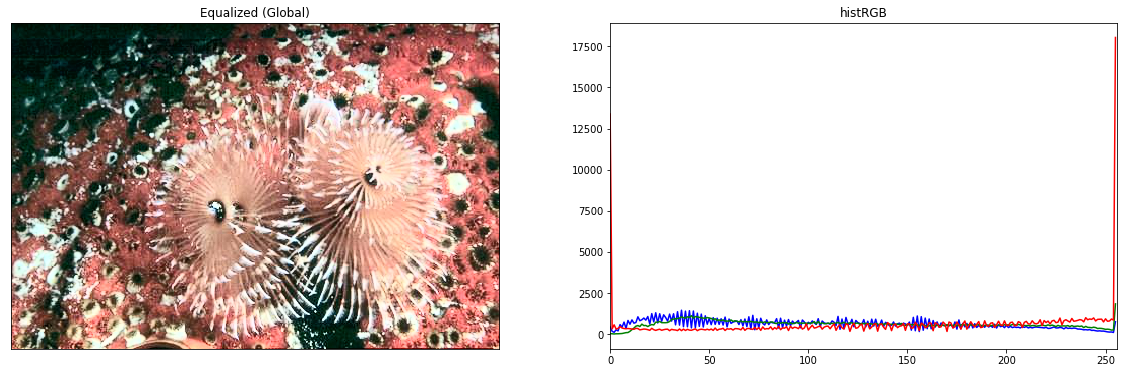

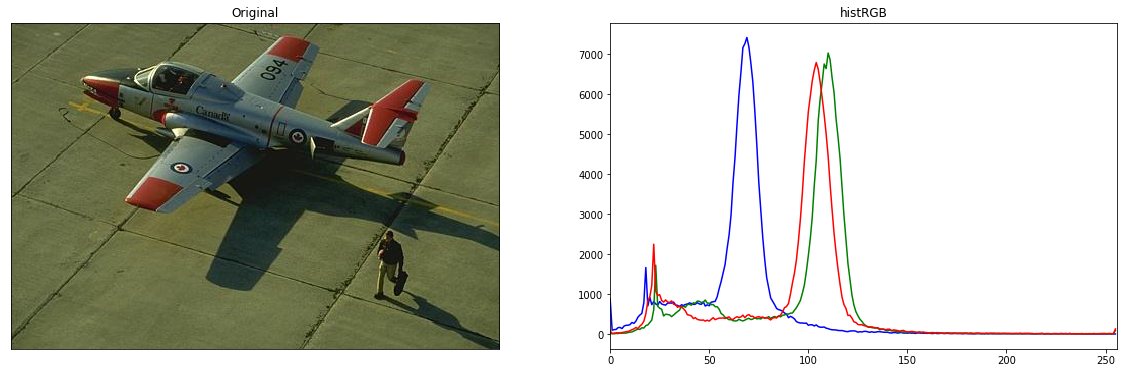

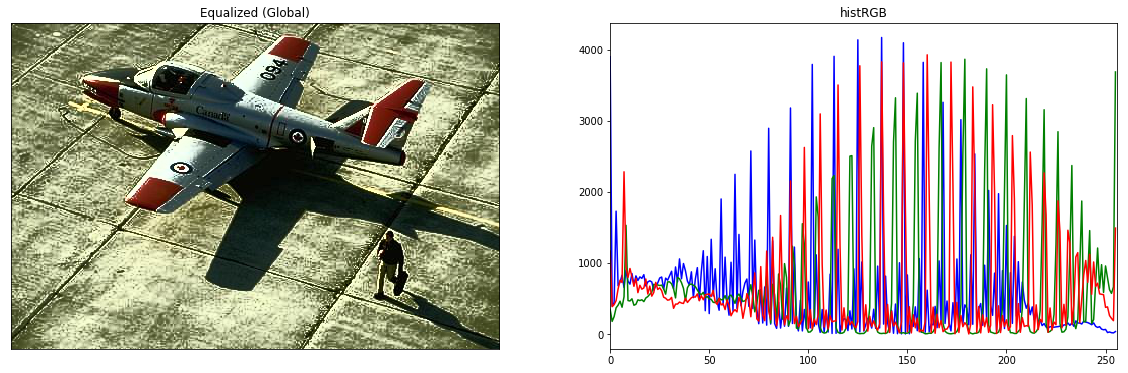

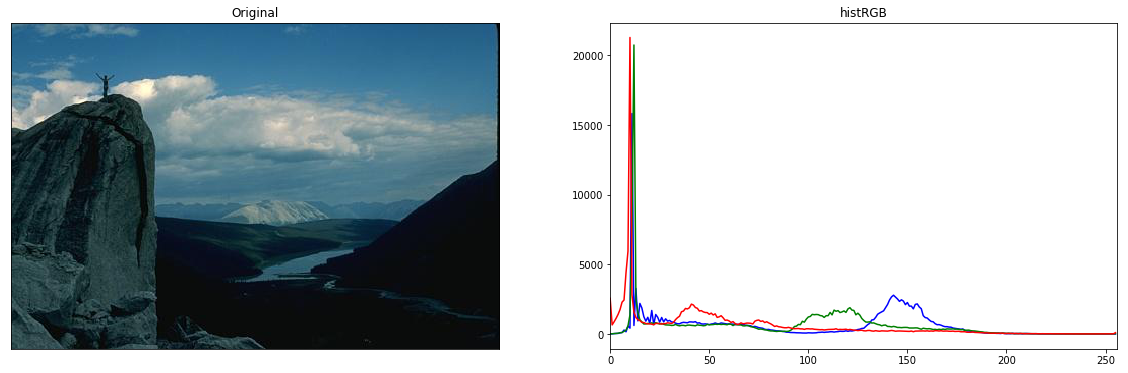

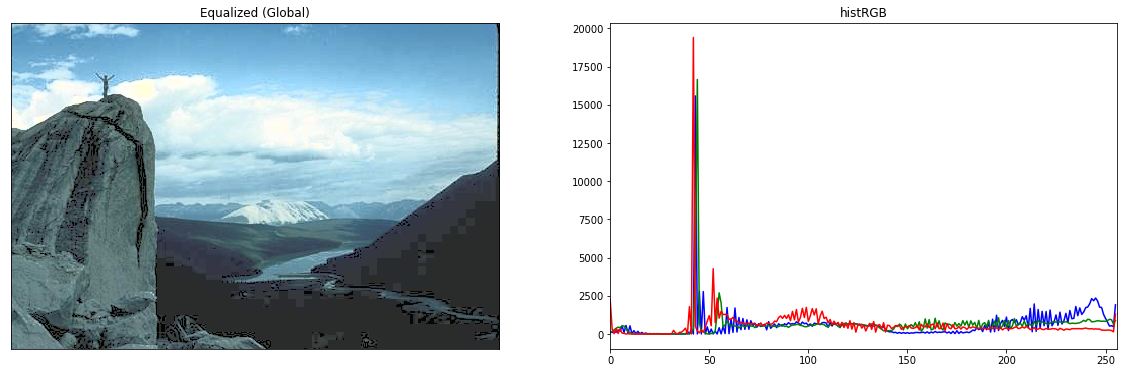

In [9]:
def histogram_equalization(imagepath):
    img = my_imread(imagepath) # Read the image in color
    img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV) # Convert the image to YUV
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0]) # Apply global histogram equalization on Y channel
    equ = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR) # Convert back to BGR 
    show_histRGB(img, "Original")
    show_histRGB(equ, "Equalized (Global)")

for imagename in IMG_NAMES:
    imagepath = os.path.join('data/img/', imagename)
    img = my_imread(imagepath) # read the image from image path using opencv.
    histogram_equalization(imagepath)

## 2.3 Adaptive Histogram Equalization (CLAHE)

clipLimit=2.0, tileGridSize=(12,12)


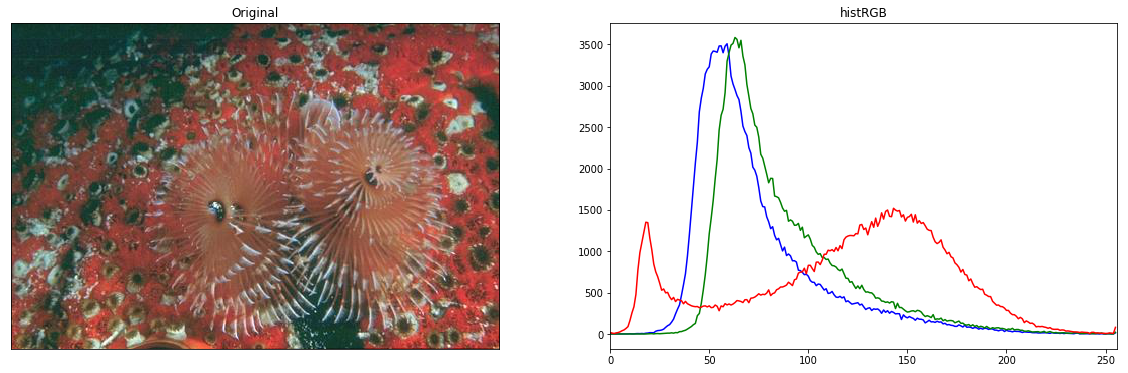

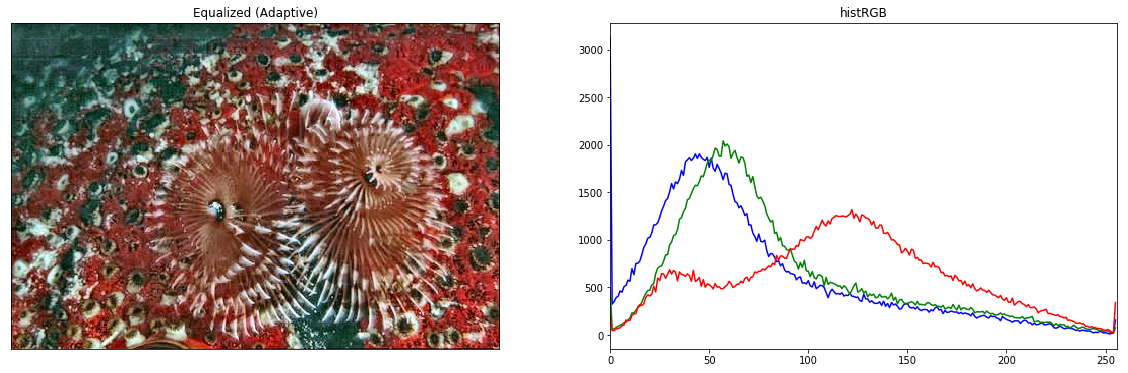

clipLimit=2.0, tileGridSize=(12,12)


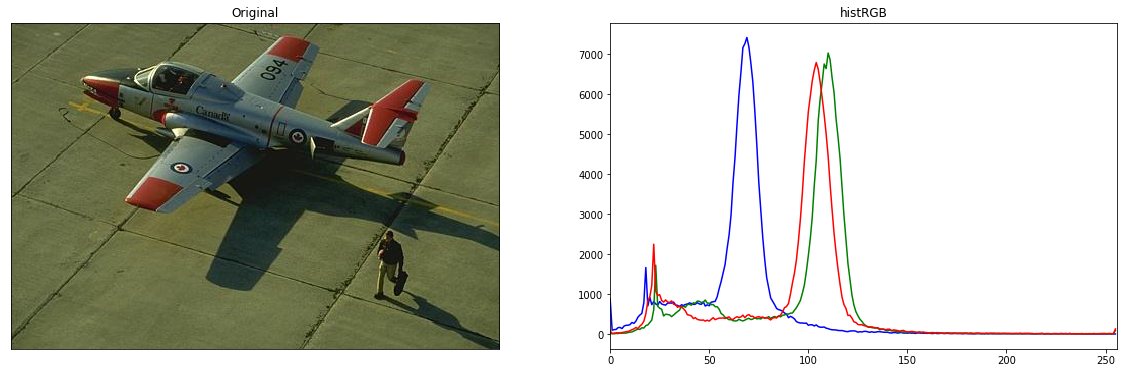

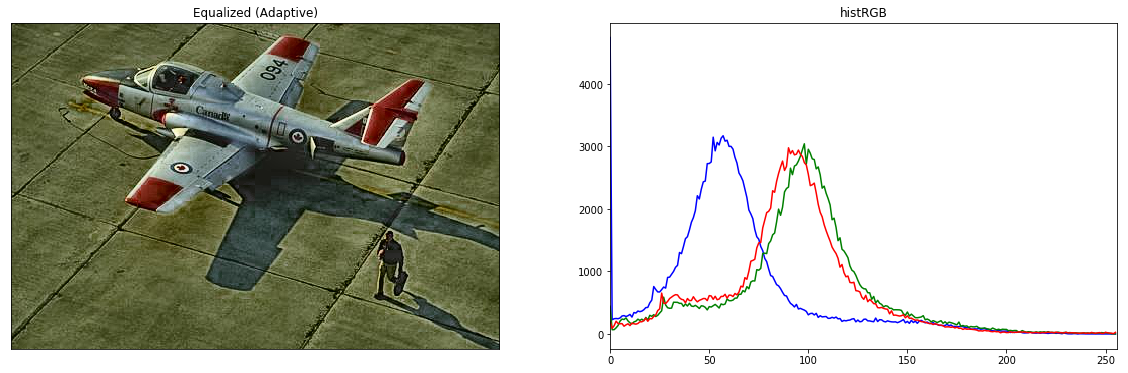

clipLimit=2.0, tileGridSize=(12,12)


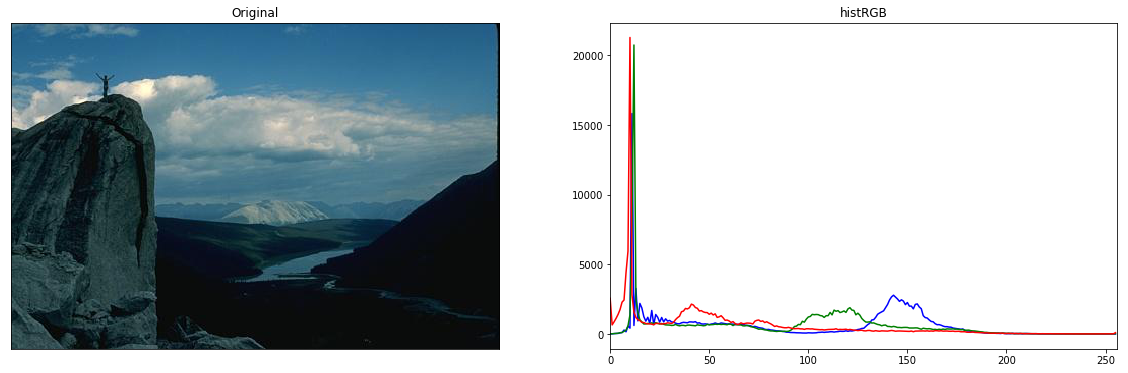

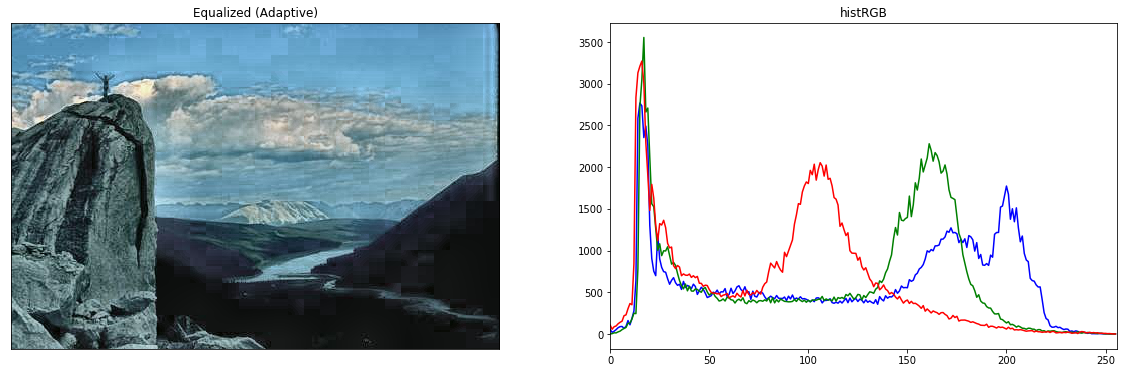

In [10]:
def adaptive_histogram_equalization(imagepath):
    img = my_imread(imagepath) # Read the image in color
    img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV) # Convert the image to YUV
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(12,12)) # a) Create clahe    
    print('clipLimit=2.0, tileGridSize=(12,12)') # b) Print all the hyper parameters used.
    img_yuv[:,:,0] = clahe.apply(img[:,:,0]) # c) Apply CLAHE onto the Y channel
    equ = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR) # Convert back to BGR
    show_histRGB(img, "Original")
    show_histRGB(equ, "Equalized (Adaptive)")
    
for imagename in IMG_NAMES:
    imagepath = os.path.join('data/img/', imagename)
    img = my_imread(imagepath) # read the image from image path using opencv.
    adaptive_histogram_equalization(imagepath)

###  d) Did you find any difference between the two techniques? (Please briefly answer this question in this block)
The adaptive equalization seems to be working better we can see for the airplane and underwater image the global equalization method makes the images too bright as opposed to adaptive one. Even in the mountain scenery although the adaptive equalization has a little more blocky appearance, it preserves the local shading visible on the rock on the left which looks pretty plain in the global equalization. The histograms also look much better in the adaptive method as they seem to preserve the original relative structure unlike global method which just produces seemingly mashed up histograms.